### Strong Scalability

In [36]:
import subprocess
import re

tot_time_array=[]
par_time_array=[]
tot_average_array=[]
par_average_array=[]

for i in range(1,7):
    temp = []
    temp2 = []
    print(i)
    for j in range(10):
        cmd = [
            "time",
            "mpirun",
            "-np", str(i),
            "../src/main",
            "../src/output100000.csv",
            "3"
        ]

        result = subprocess.run(
            cmd,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )

        program_output = result.stdout     # output from your C++ program
        timing_output = result.stderr      # time + MPI diagnostics
        return_code = result.returncode

        #print("Return code:", return_code)
        #print("Program output:\n", program_output)
        #print("Timing info:\n", timing_output)

        match = re.search(r"Elapsed time Total:\s*([\d.]+)", program_output)
        match2 = re.search(r"Elapsed time Parallel:\s*([\d.]+)", program_output)
        if match2:
            elapsed_par = float(match2.group(1))
            #print(elapsed_par)   
            temp2.append(elapsed_par)
        if match:
            elapsed_tot = float(match.group(1))
            #print(elapsed_tot)   
            temp.append(elapsed_tot)
    tot_time_array.append(temp)
    par_time_array.append(temp2)
    average = sum(temp)/len(temp)
    print("average: "+str(average))
    tot_average_array.append(average)
    average = sum(temp2)/len(temp2)
    print("average: "+str(average))
    par_average_array.append(average)

1
average: 70.32328
average: 70.26129
2
average: 32.28326
average: 32.22462
3
average: 19.2029
average: 19.138094000000002
4
average: 16.387172999999997
average: 16.324285
5
average: 17.734773
average: 17.673829
6
average: 19.495753999999998
average: 19.424807


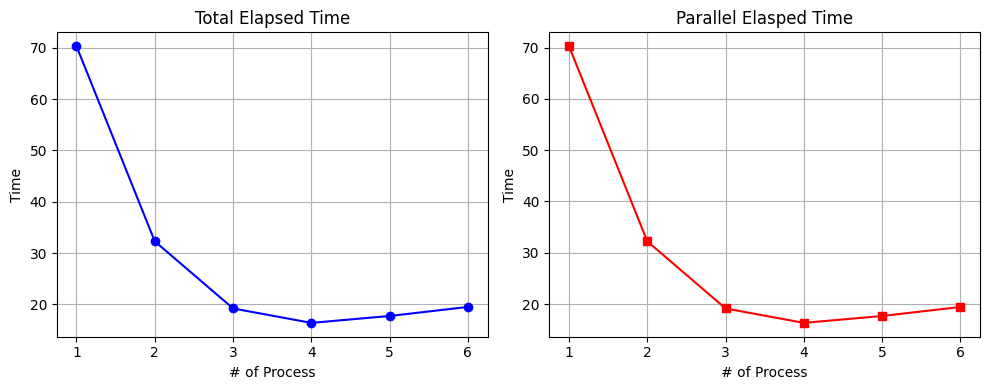

In [37]:
import matplotlib.pyplot as plt

x = list(range(1,len(tot_average_array)+1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# First graph
ax1.plot(x, tot_average_array, marker='o', color='blue')
ax1.set_xlabel("# of Process")
ax1.set_ylabel("Time")
ax1.set_title("Total Elapsed Time")
ax1.grid(True)

# Second graph
ax2.plot(x, par_average_array, marker='s', color='red')
ax2.set_xlabel("# of Process")
ax2.set_ylabel("Time")
ax2.set_title("Parallel Elasped Time")
ax2.grid(True)

plt.tight_layout()  # avoid overlapping labels
plt.show()

### Weak Scalability

In [29]:
import subprocess
import re

tot_time_array=[]
par_time_array=[]
tot_average_array=[]
par_average_array=[]

for i in range(1,7):
    temp = []
    temp2 = []
    print(i)
    for j in range(10):
        cmd = [
            "time",
            "mpirun",
            "-np", str(i),
            "../src/main",
            "../src/output"+str(i)+"00000.csv",
            "2"
        ]

        result = subprocess.run(
            cmd,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )

        program_output = result.stdout     # output from your C++ program
        timing_output = result.stderr      # time + MPI diagnostics
        return_code = result.returncode

        #print("Return code:", return_code)
        #print("Program output:\n", program_output)
        #print("Timing info:\n", timing_output)

        match = re.search(r"Elapsed time Total:\s*([\d.]+)", program_output)
        match2 = re.search(r"Elapsed time Parallel:\s*([\d.]+)", program_output)
        if match2:
            elapsed_par = float(match2.group(1))
            #print(elapsed_par)   
            temp2.append(elapsed_par)
        if match:
            elapsed_tot = float(match.group(1))
            #print(elapsed_tot)   
            temp.append(elapsed_tot)
    tot_time_array.append(temp)
    par_time_array.append(temp2)
    average = sum(temp)/len(temp)
    print("average: "+str(average))
    tot_average_array.append(average)
    average = sum(temp2)/len(temp2)
    print("average: "+str(average))
    par_average_array.append(average)

1
average: 0.2615359
average: 0.2063221
2
average: 0.3225462
average: 0.21289850000000002
3
average: 0.44177900000000003
average: 0.2798484
4
average: 0.6758164
average: 0.43544700000000003
5
average: 0.7353923
average: 0.4265845
6
average: 0.9984517
average: 0.5798137


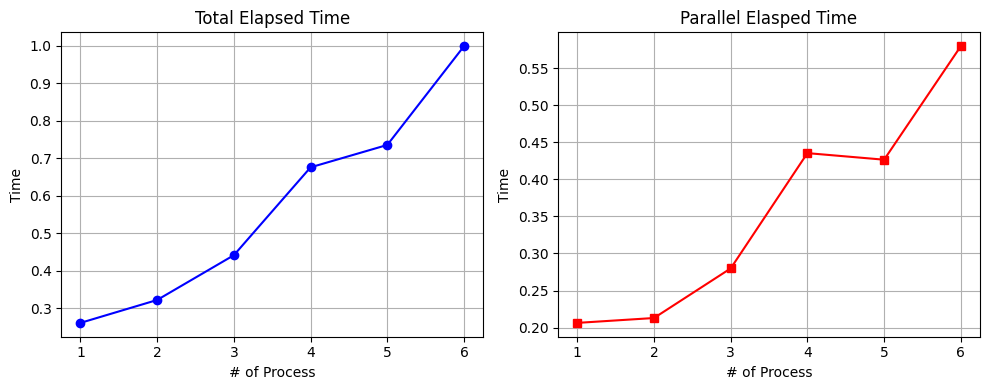

In [30]:
import matplotlib.pyplot as plt

x = list(range(1,len(tot_average_array)+1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# First graph
ax1.plot(x, tot_average_array, marker='o', color='blue')
ax1.set_xlabel("# of Process")
ax1.set_ylabel("Time")
ax1.set_title("Total Elapsed Time")
ax1.grid(True)

# Second graph
ax2.plot(x, par_average_array, marker='s', color='red')
ax2.set_xlabel("# of Process")
ax2.set_ylabel("Time")
ax2.set_title("Parallel Elasped Time")
ax2.grid(True)

plt.tight_layout()  # avoid overlapping labels
plt.show()